In [71]:
import os 
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

import seaborn as sns
import jenkspy

In [2]:
data_dir = "../data"

In [5]:
pop_fp = os.path.join(data_dir, "singstat", "sg_population_2015ghs.csv")
pop_df = pd.read_csv(pop_fp)
pop_df.head()

,Subzone,Population
0,Ang Mo Kio Town Centre,5020
1,Cheng San,29770
2,Chong Boon,27900
3,Kebun Bahru,23910
4,Sembawang Hills,6890


In [29]:
region = gpd.read_file("../data/region-2014/MP14_REGION_WEB_PL.shp")
parea = gpd.read_file("../data/planning-area-2014/MP14_PLNG_AREA_WEB_PL.shp")

In [6]:
subzone_fp = os.path.join(data_dir, "subzone-2014", "MP14_SUBZONE_WEB_PL.shp")
subzone = gpd.read_file(subzone_fp)
subzone.head()

,OBJECTID,SUBZONE_NO,SUBZONE_N,SUBZONE_C,CA_IND,PLN_AREA_N,PLN_AREA_C,REGION_N,REGION_C,INC_CRC,FMEL_UPD_D,X_ADDR,Y_ADDR,SHAPE_Leng,SHAPE_Area,geometry
0,1,1,MARINA SOUTH,MSSZ01,Y,MARINA SOUTH,MS,CENTRAL REGION,CR,5ED7EB253F99252E,2014-12-05,31595.8357,29220.1873,5267.381024,1.630379e+06,"POLYGON ((31495.560 30140.012, 31980.957 29671..."
1,2,1,PEARL'S HILL,OTSZ01,Y,OUTRAM,OT,CENTRAL REGION,CR,8C7149B9EB32EEFC,2014-12-05,28679.0634,29782.0519,3506.107376,5.598162e+05,"POLYGON ((29092.275 30021.888, 29119.641 30006..."
2,3,3,BOAT QUAY,SRSZ03,Y,SINGAPORE RIVER,SR,CENTRAL REGION,CR,C35FEFF02B13E0E5,2014-12-05,29654.9594,29974.6553,1740.925766,1.608075e+05,"POLYGON ((29932.332 29879.120, 29947.317 29858..."
3,4,8,HENDERSON HILL,BMSZ08,N,BUKIT MERAH,BM,CENTRAL REGION,CR,3775D82C5DDBEFBD,2014-12-05,26782.8261,29933.7651,3313.624904,5.954289e+05,"POLYGON ((27131.276 30059.727, 27088.334 29709..."
4,5,3,REDHILL,BMSZ03,N,BUKIT MERAH,BM,CENTRAL REGION,CR,85D9ABEF0A40678F,2014-12-05,26201.9580,30005.7035,2825.594099,3.874294e+05,"POLYGON ((26451.027 30396.458, 26440.474 30361..."


In [9]:
pop_df["Subzone2"] = pop_df["Subzone"].str.upper()
pop_df.head()

,Subzone,Population,Subzone2
0,Ang Mo Kio Town Centre,5020,ANG MO KIO TOWN CENTRE
1,Cheng San,29770,CHENG SAN
2,Chong Boon,27900,CHONG BOON
3,Kebun Bahru,23910,KEBUN BAHRU
4,Sembawang Hills,6890,SEMBAWANG HILLS


In [10]:
subzone2 = subzone.merge(pop_df, left_on="SUBZONE_N", right_on="Subzone2")
subzone2.head()

,OBJECTID,SUBZONE_NO,SUBZONE_N,SUBZONE_C,CA_IND,PLN_AREA_N,PLN_AREA_C,REGION_N,REGION_C,INC_CRC,FMEL_UPD_D,X_ADDR,Y_ADDR,SHAPE_Leng,SHAPE_Area,geometry,Subzone,Population,Subzone2
0,1,1,MARINA SOUTH,MSSZ01,Y,MARINA SOUTH,MS,CENTRAL REGION,CR,5ED7EB253F99252E,2014-12-05,31595.8357,29220.1873,5267.381024,1.630379e+06,"POLYGON ((31495.560 30140.012, 31980.957 29671...",Marina South,-,MARINA SOUTH
1,2,1,PEARL'S HILL,OTSZ01,Y,OUTRAM,OT,CENTRAL REGION,CR,8C7149B9EB32EEFC,2014-12-05,28679.0634,29782.0519,3506.107376,5.598162e+05,"POLYGON ((29092.275 30021.888, 29119.641 30006...",Pearl's Hill,8230,PEARL'S HILL
2,3,3,BOAT QUAY,SRSZ03,Y,SINGAPORE RIVER,SR,CENTRAL REGION,CR,C35FEFF02B13E0E5,2014-12-05,29654.9594,29974.6553,1740.925766,1.608075e+05,"POLYGON ((29932.332 29879.120, 29947.317 29858...",Boat Quay,180,BOAT QUAY
3,4,8,HENDERSON HILL,BMSZ08,N,BUKIT MERAH,BM,CENTRAL REGION,CR,3775D82C5DDBEFBD,2014-12-05,26782.8261,29933.7651,3313.624904,5.954289e+05,"POLYGON ((27131.276 30059.727, 27088.334 29709...",Henderson Hill,12870,HENDERSON HILL
4,5,3,REDHILL,BMSZ03,N,BUKIT MERAH,BM,CENTRAL REGION,CR,85D9ABEF0A40678F,2014-12-05,26201.9580,30005.7035,2825.594099,3.874294e+05,"POLYGON ((26451.027 30396.458, 26440.474 30361...",Redhill,12210,REDHILL


In [33]:
subzone2.crs

{'proj': 'tmerc',
 'lat_0': 1.366666666666667,
 'lon_0': 103.8333333333333,
 'k': 1,
 'x_0': 28001.642,
 'y_0': 38744.572,
 'datum': 'WGS84',
 'units': 'm',
 'no_defs': True}

In [42]:
subzone2["area"] = subzone2.area/1000000

In [43]:
subzone2["pop"] = pd.to_numeric(subzone2["Population"], errors='coerce')
subzone2["pop"] = subzone2["pop"].fillna(0)

In [44]:
subzone2["population_density"] = subzone2["pop"] / subzone2["area"]

In [50]:
subzone2[subzone2["population_density"]>0]["population_density"].min(), subzone2["population_density"].max()

(0.26919455097386485, 48556.938935554266)

In [101]:
breaks = jenkspy.jenks_breaks(subzone2[subzone2["population_density"]>0]["population_density"], nb_class=5)
breaks = [ round(v,-3) for v in breaks ]
#breaks[-1] = breaks[-1]+1
breaks#[:-1]

[0.0, 4000.0, 11000.0, 22000.0, 33000.0, 49000.0]

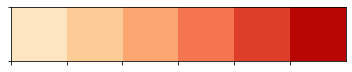

In [102]:
current_palette = sns.color_palette("OrRd")
sns.palplot(current_palette)

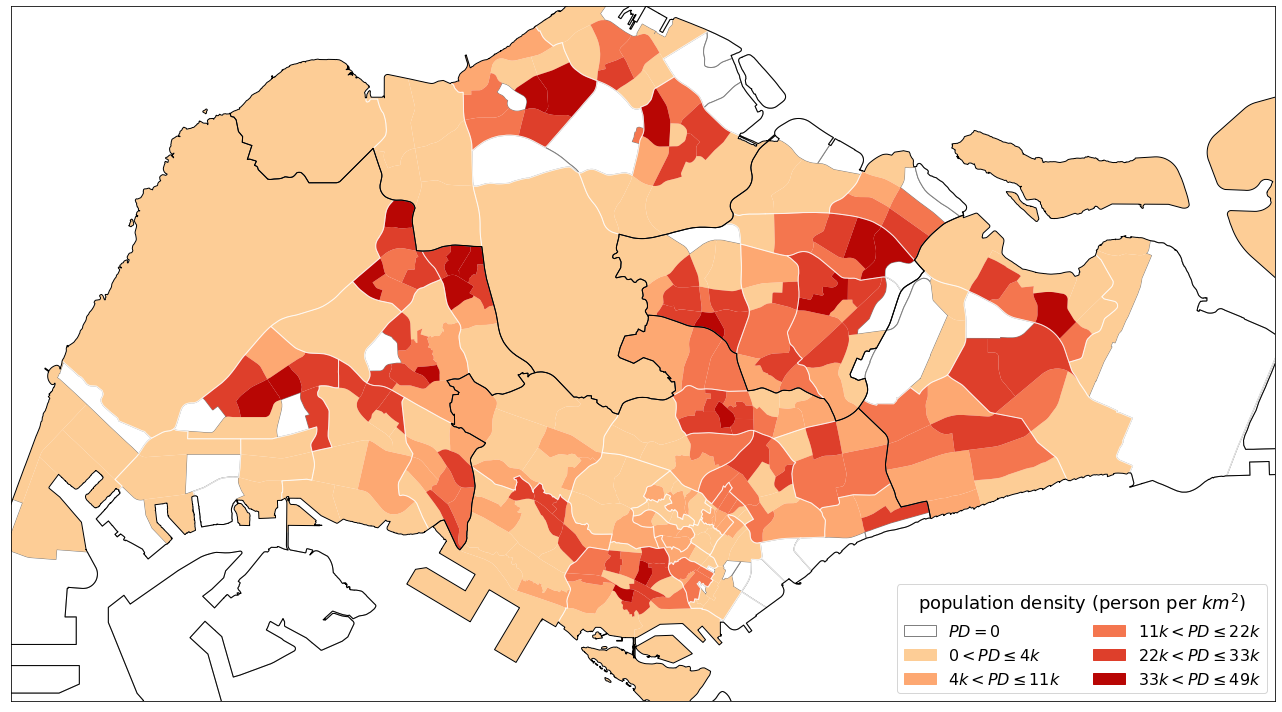

In [110]:
fig, ax = plt.subplots(figsize=(20,10))
#subzone2.plot(column='population_density', cmap='OrRd', ax=ax, legend=True)

patches = []
temp = subzone2[subzone2["population_density"]==0]
temp.plot(fc="white", ax=ax, ec="gray")
lab = "$PD=0$"
pat = mpatches.Patch(color="w", ec="gray", label=lab)
patches.append(pat)

for i in range(len(breaks[:-1])):
    c = current_palette[i+1]
    temp = subzone2[subzone2["population_density"]>breaks[i]]
    temp = temp[temp["population_density"]<=breaks[i+1]]
    temp.plot(fc=c, ax=ax)
    if breaks[i]==0:
        lab = "$0<PD\leq{}k$".format(int(breaks[i+1]/1000))
    else:
        lab = "${}k<PD\leq{}k$".format(int(breaks[i]/1000), int(breaks[i+1]/1000))
    pat = mpatches.Patch(color=c, label=lab)
    patches.append(pat)
leg = ax.legend(handles=patches, ncol=2, fontsize=16, loc="lower right")
leg.set_title("population density (person per $km^2$)", prop={'size':18})

parea.plot(fc="none", ec="white", alpha=.6, ax=ax)
region.plot(fc="none", ec="k", ax=ax)
ax.set_xlim([4500,50000])
ax.set_ylim([25000,50000])
ax.set_xticks([])
ax.set_yticks([])
#ax.set_title("Population Density")
plt.tight_layout()
plt.savefig("figs/population_density_map.png", bbox_inches="tight", dpi=100)